<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/DT/01_workshop_oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# **Descripción**
---
El conjunto de datos describe las propiedades químicas del vidrio e implica la clasificación de muestras de vidrio utilizando sus propiedades químicas como una de seis clases. El conjunto de datos fue acreditado a Vina Spiehler en 1987.


# **Diccionario**
---
- RI: Refractive Index
- Na: Sodium
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- Class: 
  - building windows (float processed)
  - building windows (non-float processed)
  - vehicle windows (float processed)
  - vehicle windows (non-float processed)
  - containers
  - tableware
  - headlamps

# **Data**
---

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv', 
                   names=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'])

In [4]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
def sample_fit():
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    return X, y

In [7]:
def plot_bars(data, title: str= 'feature', x_size:int=6, y_size:int=5, 
              font_size:int=15):
  fig, ax = plt.subplots(figsize = (x_size, y_size))
  fig.suptitle(f'Count plot {title}', fontsize = font_size)
  sns.countplot(x = data, ax = ax)
  len_data = data.shape[0]

  for p in ax.patches:
    height = int(p.get_height())
    porc = '{0:.2f}%'.format(height/len_data)
    plt.text(p.get_x()+p.get_width()/2., height-height*0.05, porc, ha="center", backgroundcolor='y')

# **Sin Sobremuestreo**
---

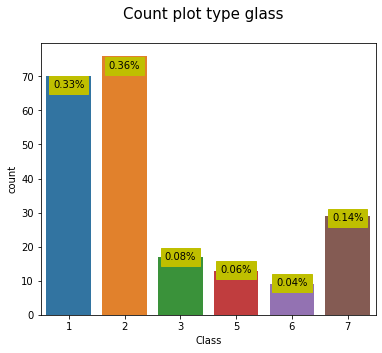

In [9]:
_, y = sample_fit()

plot_bars(y, 'type glass')

# **Sobremuestreo**
---

In [10]:
X, y = sample_fit()

In [11]:
#Estimador de sobremuestreo
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

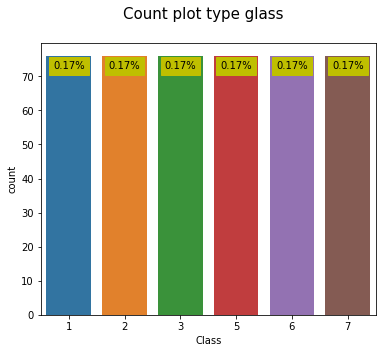

In [12]:
plot_bars(y, 'type glass')

# **Sobremuestreo Condicional**
---
- sobremuestrear a 100 ejemplos en las clases 1 y 2  
- sobremuestrear a 50 ejemplos las clases 3,5 y 6.
- sobremuestrear a 150 ejemplos la clase 7.

In [ ]:
X, y = sample_fit()
strategy = {1:100, 2:100, 3:50, 5:50, 6:50, 7:70}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)

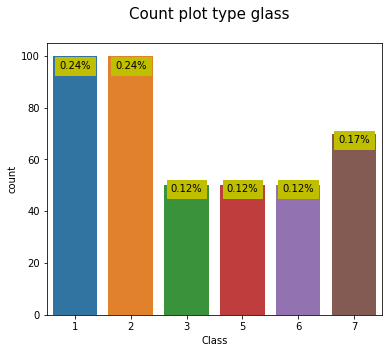

In [14]:
plot_bars(y, 'type glass')

**Cuando se utiliza el muestreo de datos como SMOTE, solo debe aplicarse al conjunto de datos de entrenamiento, no al conjunto de datos completo.**

# **Referencias**
---
https://machinelearningmastery.com/multi-class-imbalanced-classification/